In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
dataset = pd.read_excel("USSuperstore_data.xlsx")
dataset.head(3)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.0,6.8714


In [3]:
dataset.shape

(9994, 21)

In [4]:
display(dataset[0:2].T)

,0,1
Row ID,1,2
Order ID,CA-2016-152156,CA-2016-152156
Order Date,2016-11-08 00:00:00,2016-11-08 00:00:00
Ship Date,2016-11-11 00:00:00,2016-11-11 00:00:00
Ship Mode,Second Class,Second Class
Customer ID,CG-12520,CG-12520
Customer Name,Claire Gute,Claire Gute
Segment,Consumer,Consumer
Country,United States,United States
City,Henderson,Henderson


# Start work with missing values 
## Find and fill those missing values

In [5]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# If finds any null value then fill it with "fillna" feature with mean
### dataset["xyz"].fillna(dataset["xyz"].mean(), inplace = True)

In [6]:
import plotly_express as px

<Axes: xlabel='Segment', ylabel='count'>

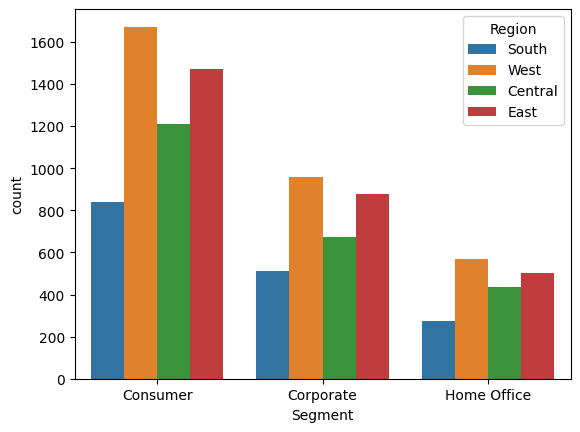

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x="Segment", hue="Region" , data=dataset)

<Axes: xlabel='Sales', ylabel='count'>

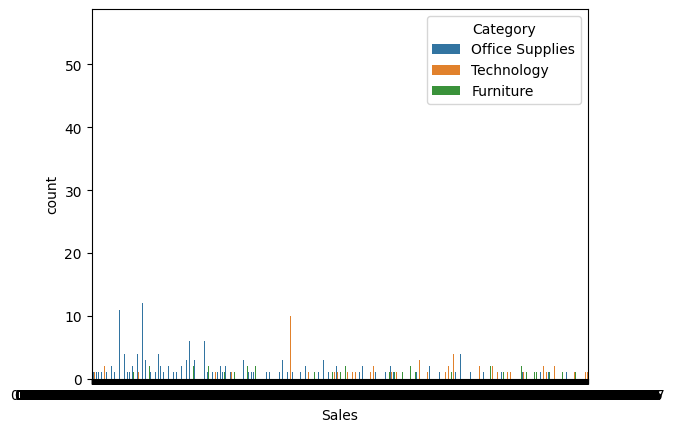

In [10]:
sns.countplot(x="Sales", hue="Category" , data=dataset)

<Axes: xlabel='Category', ylabel='count'>

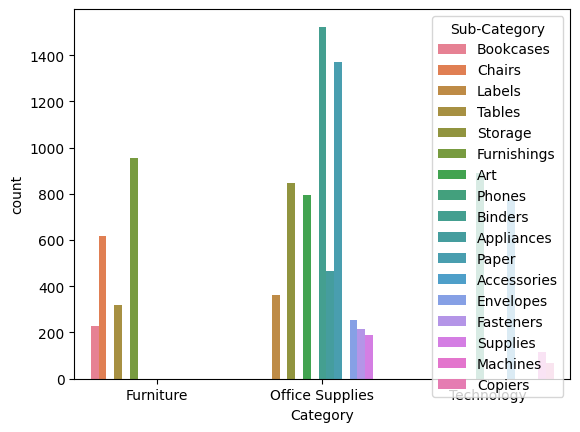

In [11]:
sns.countplot(x="Category", hue="Sub-Category" , data=dataset)

<Axes: xlabel='Category', ylabel='count'>

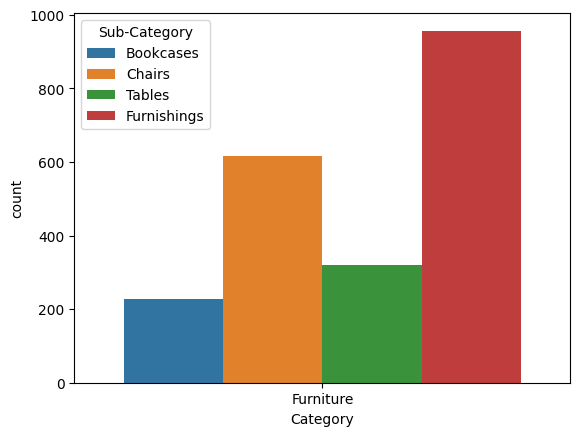

In [12]:
sns.countplot(x="Category", hue="Sub-Category" , data=dataset[dataset["Category"]=="Furniture"])

<Axes: xlabel='Category', ylabel='count'>

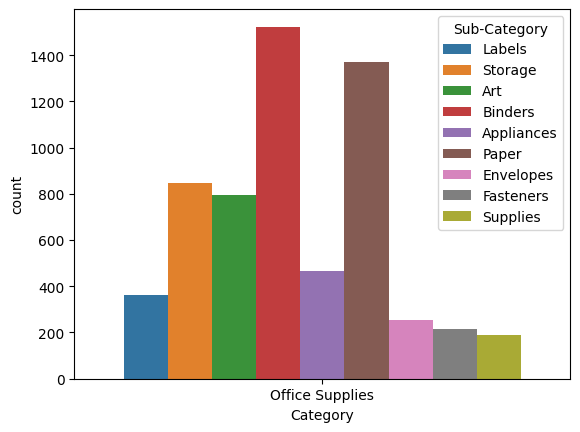

In [13]:
sns.countplot(x="Category", hue="Sub-Category" , data=dataset[dataset["Category"]=="Office Supplies"])

<Axes: xlabel='Category', ylabel='count'>

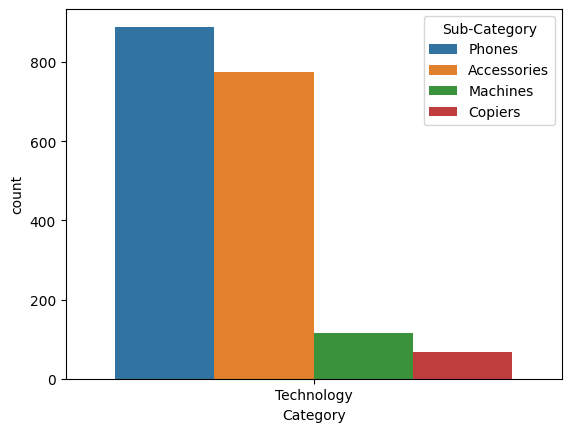

In [14]:
sns.countplot(x="Category", hue="Sub-Category" , data=dataset[dataset["Category"]=="Technology"])

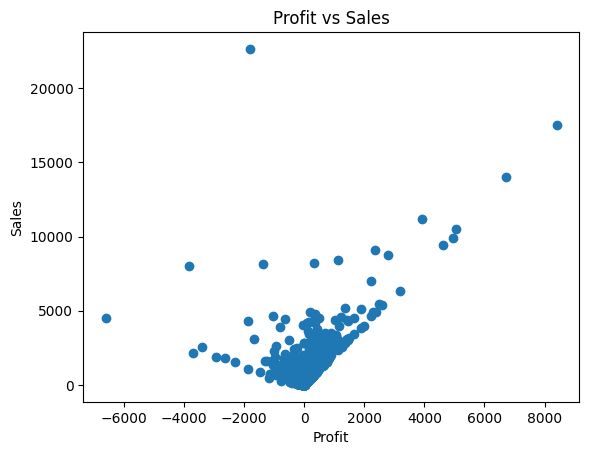

In [31]:
plt.scatter(dataset['Profit'], dataset['Sales']) 
plt.xlabel('Profit') 
plt.ylabel('Sales') 
plt.title('Profit vs Sales') 
plt.show()

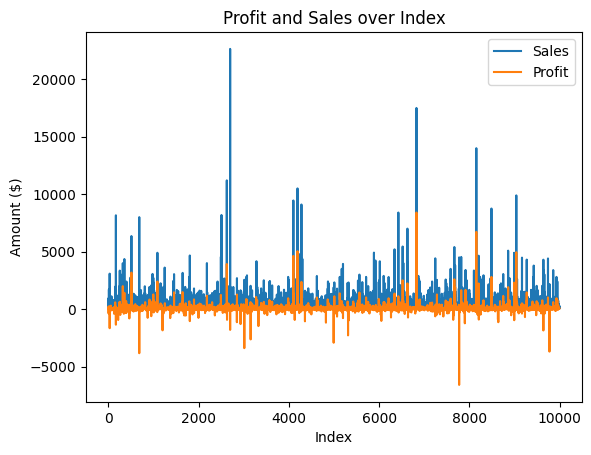

In [32]:
plt.plot(dataset['Sales'], label='Sales') 
plt.plot(dataset['Profit'], label='Profit') 
plt.xlabel('Index') 
plt.ylabel('Amount ($)') 
plt.title('Profit and Sales over Index') 
plt.legend() 
plt.show()

In [33]:
region_sales = dataset.groupby('Region')['Sales'].sum()

# Print the result
print(region_sales)

Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


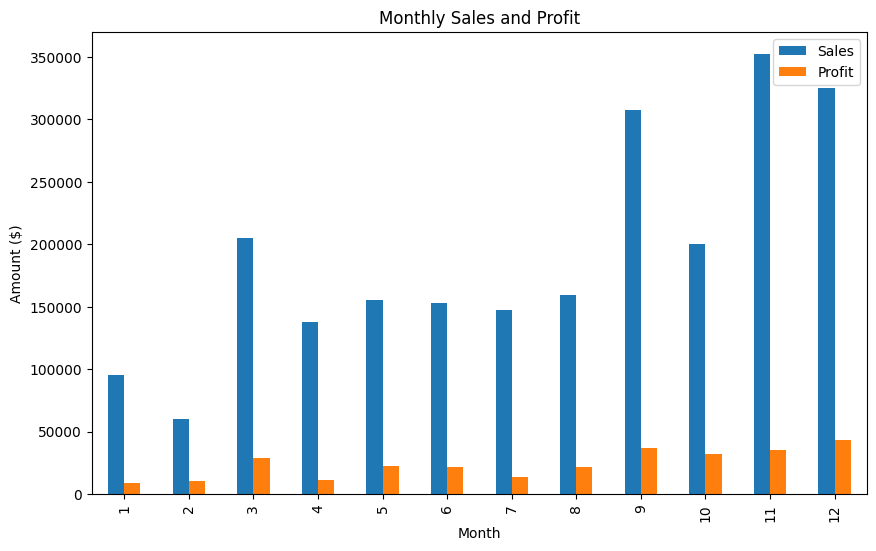

In [34]:
monthly_sales = dataset.groupby(dataset['Order Date'].dt.month)[['Sales', 'Profit']].sum()

monthly_sales.plot(kind='bar', figsize=(10,6))
plt.title('Monthly Sales and Profit')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.legend(['Sales', 'Profit'])
plt.show()

In [42]:
import pandas as pd
import plotly.express as px

# Perform time series analysis on sales and quantity columns
dataset['Order Date'] = pd.to_datetime(dataset['Order Date']) # Convert Order Date column to datetime format
df = dataset.set_index('Order Date') # Set Order Date as the index for the dataframe
sales_ts = df['Sales'].resample('MS').sum() # Resample the Sales column by month and calculate the sum
quantity_ts = df['Quantity'].resample('MS').sum() # Resample the Quantity column by month and calculate the sum

# Create a line chart using Plotly Express
fig = px.line(dataset, x=sales_ts.index, y=sales_ts.values, title='Monthly Sales Time Series')
fig.show()

# Create a bar chart using Plotly Express
fig = px.bar(dataset, x=quantity_ts.index, y=quantity_ts.values, title='Monthly Quantity Time Series')
fig.show()

In [43]:
import pandas as pd
import plotly.express as px

# Perform time series analysis on sales data
sales_ts = dataset.groupby('Order Date')['Sales'].sum().reset_index()

# Create a line plot using plotly and gridon template
fig = px.line(sales_ts, x='Order Date', y='Sales', template='gridon')

# Display the plot
fig.show()

In [44]:
import plotly.express as px 
fig = px.treemap(dataset, path=['Region', 'Segment', 'State'], values='Sales') 
fig.show()


In [45]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Group the dataframe by state and sum the sales
state_sales = dataset.groupby('State')['Sales'].sum().reset_index()

# Plot the data using plotly express with the dark template
fig = px.bar(state_sales, x='State', y='Sales', template='plotly_dark')

# Show the plot
fig.show()

# Separate the years from the data
## First check if the order date is in the datatime type, if yes then you can do 
### else convert it to datetime

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [16]:
dataset.drop(columns= ['Product ID', 'Customer ID', 'Postal Code', 'Customer Name', 'Row ID', 'Order ID'], axis=1, inplace= True)

In [17]:
dataset.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

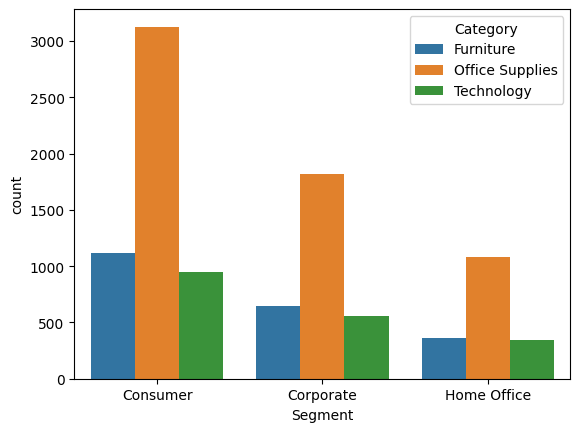

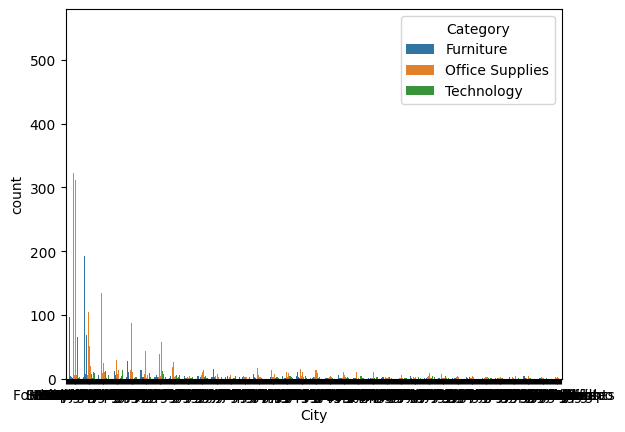

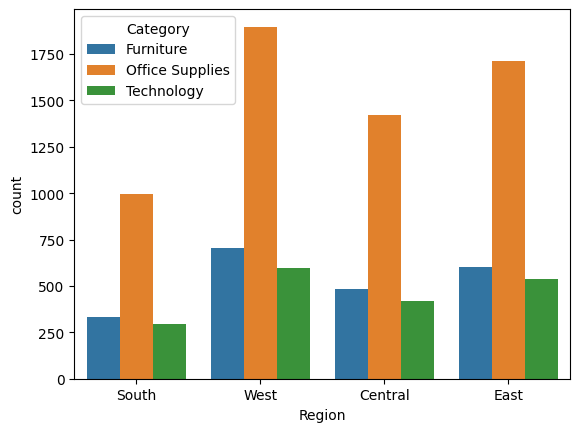

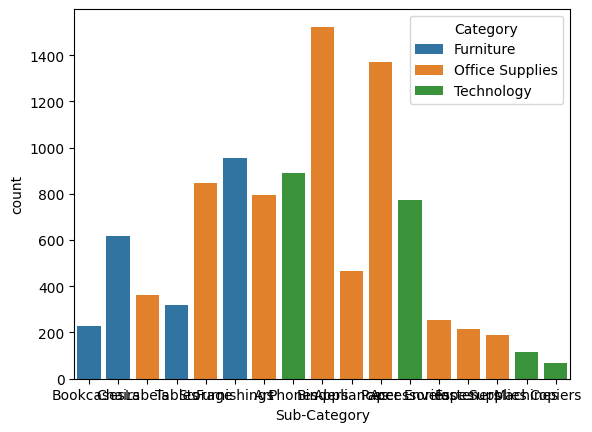

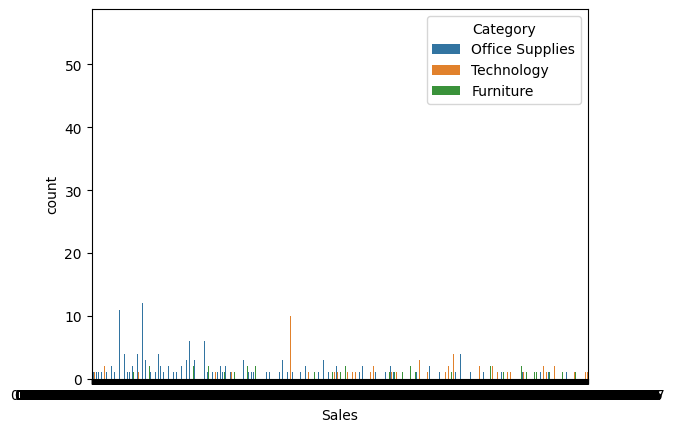

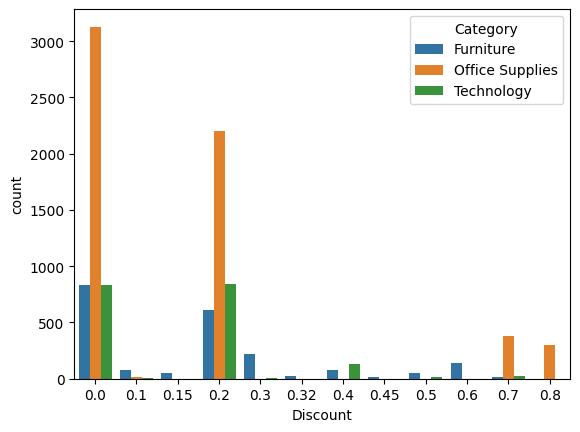

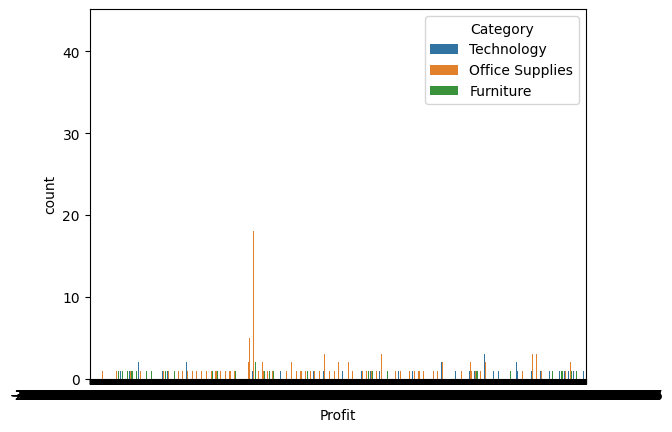

In [18]:
for i, predictor in enumerate(dataset.drop(columns=['Order Date', 'Ship Date', 'Ship Mode', 'Country', 'State',
                                                     'Product Name', 'Quantity', 'Category'])):
    plt.figure(i)
    sns.countplot(x=predictor, hue='Category', data=dataset)


In [19]:
# Separate years from the data and add year column
dataset["Order Year"] = dataset["Order Date"].dt.year

In [20]:
dataset["Order Year"].value_counts()

Order Year
2017    3312
2016    2587
2015    2102
2014    1993
Name: count, dtype: int64

<Axes: xlabel='Order Year', ylabel='count'>

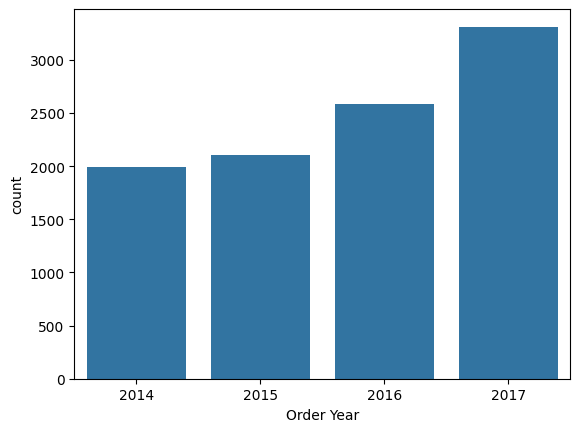

In [21]:
sns.countplot(x="Order Year", data=dataset)

<Axes: xlabel='Order Year', ylabel='count'>

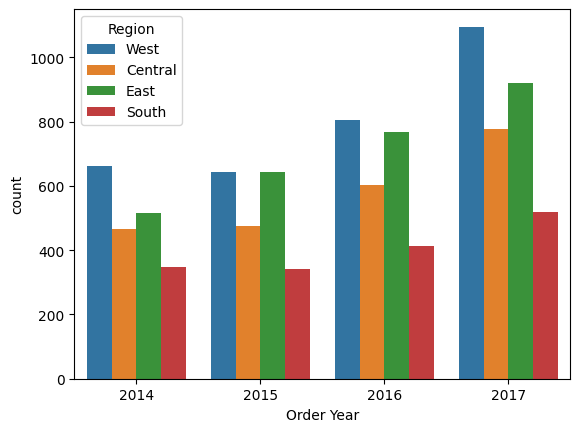

In [22]:
sns.countplot(x="Order Year", data=dataset, hue="Region")

# Check the profit from the category

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15304\389711359.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='Category', ylabel='Profit'>

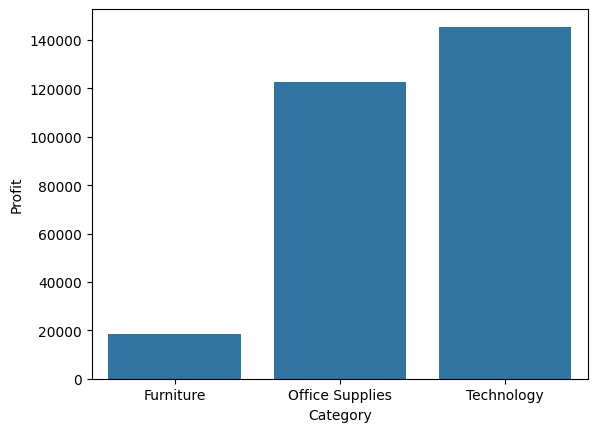

In [23]:
# With sum
sns.barplot(x="Category", y= "Profit", data=dataset, estimator="sum", ci=None)

In [24]:
# Which state has how much sales
dataset["State"].value_counts()

State
California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada  

In [25]:
# top 5 state has who has much sales
dataset["State"].value_counts()[:5]

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64

In [26]:
# top 5 city has who has much sales
dataset["City"].value_counts()[:5]

City
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: count, dtype: int64

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15304\3989610179.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




Text(0.5, 1.0, 'Discounts on different Categories')

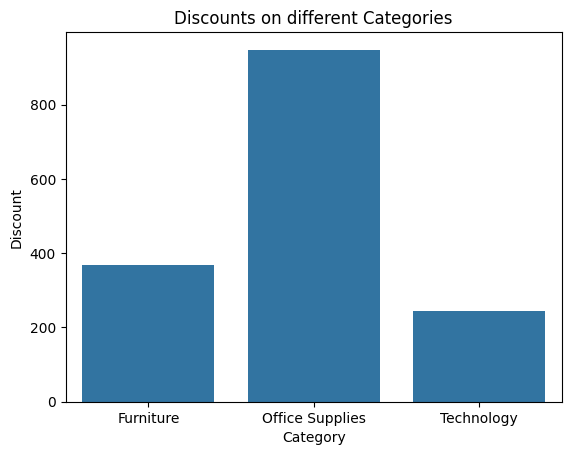

In [27]:
# Check which product we give discount
sns.barplot(x="Category", y= "Discount", data=dataset, ci=None, estimator='sum')
plt.title("Discounts on different Categories")

In [28]:
# sns.barplot(x="Sales", y= "Quantity", data=dataset, hue="Category")

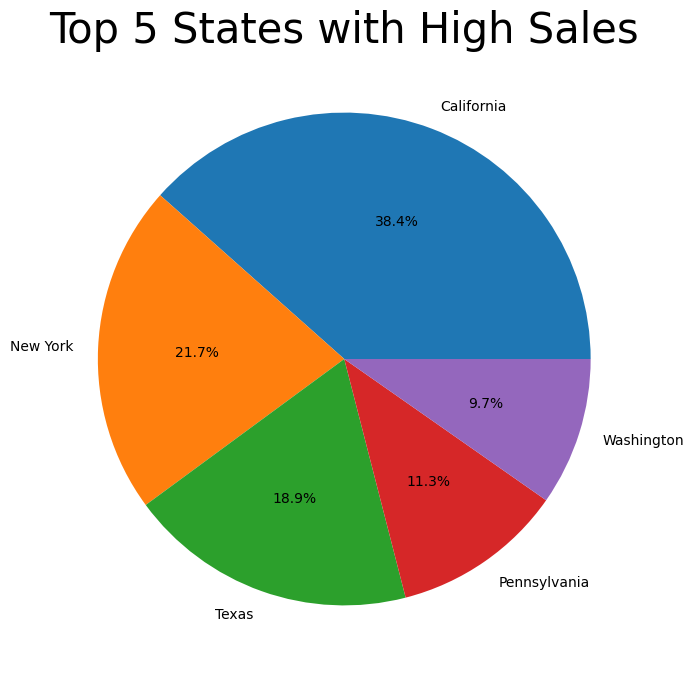

In [29]:
# cancelled_data = df[df['is_canceled'] == 1]
top_10_country = dataset['State'].value_counts()[:5]
plt.figure(figsize=(8,8))
plt.title('Top 5 States with High Sales', fontsize= 30)
plt.pie(top_10_country, autopct = '%1.1f%%', labels = top_10_country.index)
plt.show()

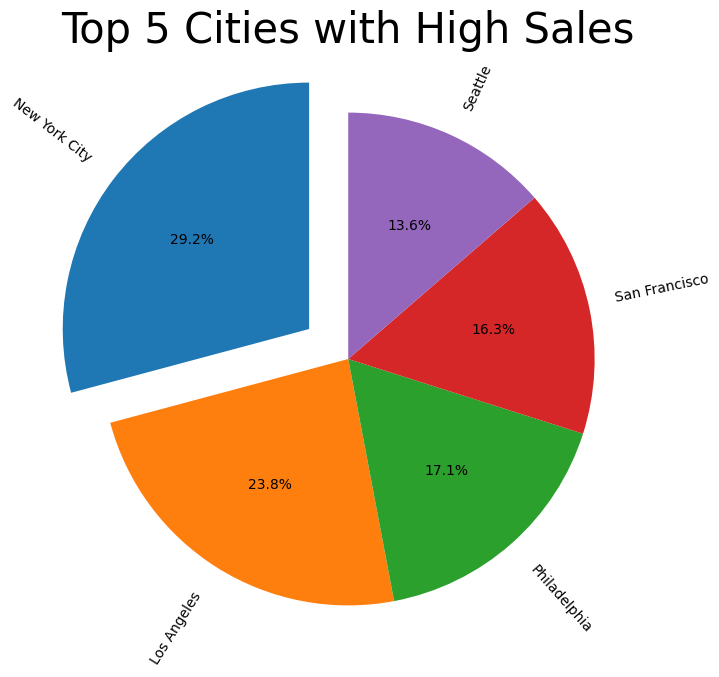

In [30]:
top_10_country = dataset['City'].value_counts()[:5]
plt.figure(figsize=(8,8))
plt.title('Top 5 Cities with High Sales', fontsize= 30)
myexplode = [0.2,0,0,0,0]
plt.pie(top_10_country, autopct = '%1.1f%%', labels = top_10_country.index, rotatelabels=True, startangle=90, explode = myexplode)
plt.show()